## Machine Learning 2 - Generalise Imputation, Imputation with linear regression, KNN Imputation and polynomial regression Model

#### Hemant Thapa

This is an open-research conducted on Machine Learning, All material used during research are free of cost and open-source softwares, such as Jupyter Notebook, pandas, Python in-built libraries, Sklearn, Matplotlib, Seaborn, and Previous publish journals.

#### Topics 

1. Mean, Median and Mode Imputation in ML Dataset
2. Imputation with Linear Regression
3. k-Neareast Neighbor (kNN) Imputation
4. Polynomial Regression Model

In [1]:
from platform import python_version
print(python_version())

3.10.9


#### Libraries

In [2]:
import pandas as pd
import math 
import statistics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


## 1. Mean, Median and Mode Imputation in ML Dataset

#### It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of the variable. 

1. Generalized Imputation: In this case, we calculate the mean or median for all non-missing values of the variable and then replace the missing value with the mean or median

2. Similar case Imputation: In this case, we calculate the mean individually of non-missing values and then replace the missing value based on other variables.

#### Example 1

In [3]:
dataset = {"City":["Glasgow", "London", "Edinburgh", "Sterling", "Manchester"], 
           "Annual_income":[21500, 30000, 23000, np.NaN, 24000],
          "Sales":[True, True, True, np.NaN, False]
          }
df = pd.DataFrame(dataset)
df

,City,Annual_income,Sales
0,Glasgow,21500.0,True
1,London,30000.0,True
2,Edinburgh,23000.0,True
3,Sterling,NaN,NaN
4,Manchester,24000.0,False


In [4]:
df["Annual_income"].describe()

count        4.000000
mean     24625.000000
std       3727.711541
min      21500.000000
25%      22625.000000
50%      23500.000000
75%      25500.000000
max      30000.000000
Name: Annual_income, dtype: float64

In [5]:
df["Sales"].value_counts()

True     3
False    1
Name: Sales, dtype: int64

In [6]:
df["Annual_income"] = df["Annual_income"].replace(np.NaN, 24625)
df["Sales"] = df["Sales"].replace(np.NaN, True)
df

,City,Annual_income,Sales
0,Glasgow,21500.0,True
1,London,30000.0,True
2,Edinburgh,23000.0,True
3,Sterling,24625.0,True
4,Manchester,24000.0,False


#### Example 2

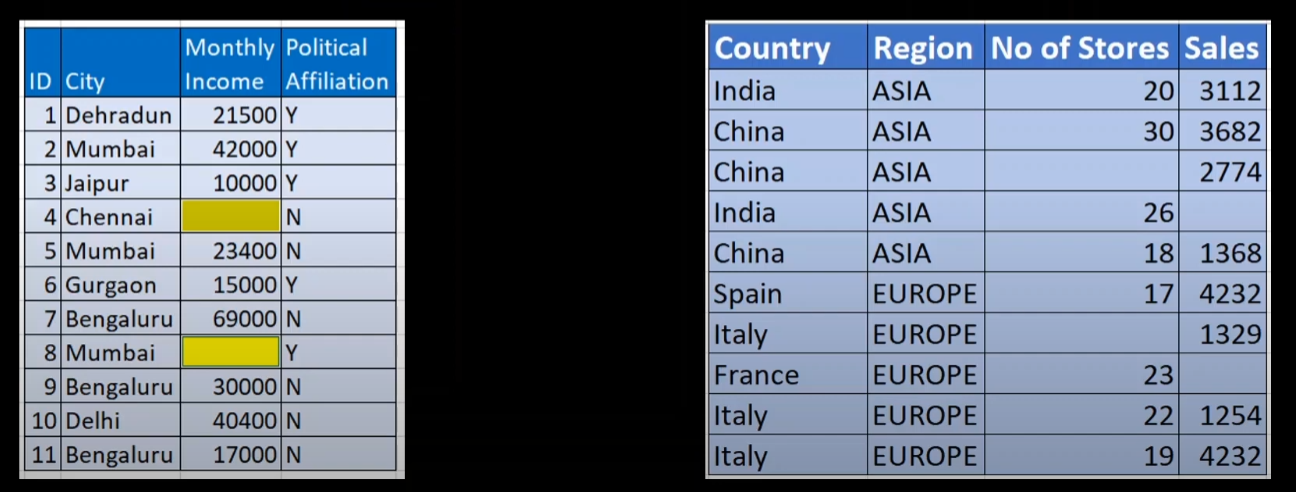

#### <font color="red"> 1. Generalized Imputation

Generalized Imputation: In this case, we calculate the mean or median for all non-missing values of the variable and then replace the missing value with the mean or median

In [7]:
#dataset of india
dataset_india = {"ID":[1,2,3,4,5,6,7,8,9,10,11],
                 "City":["Dehradun", "Mumbai","Jaipur", "Chennai", "Mumbai", "Gurgaon", "Bengaluru", "Mumbai","Bengaluru", "Delhi","Bengaluru"],
                 "Monthly income":[21500,42000,10000,np.NaN, 23400,15000,69000,np.NaN,30000,40400,17000],
                 "Political Affilation":[True, True,True,np.NaN, False, None, False,True, False,False,False],
                }
#converting into DataFrame
df_india = pd.DataFrame(dataset_india)
df_india

,ID,City,Monthly income,Political Affilation
0,1,Dehradun,21500.0,True
1,2,Mumbai,42000.0,True
2,3,Jaipur,10000.0,True
3,4,Chennai,NaN,NaN
4,5,Mumbai,23400.0,False
5,6,Gurgaon,15000.0,None
6,7,Bengaluru,69000.0,False
7,8,Mumbai,NaN,True
8,9,Bengaluru,30000.0,False
9,10,Delhi,40400.0,False


In [8]:
#Calcualting null values
df_india.isnull().sum()

ID                      0
City                    0
Monthly income          2
Political Affilation    2
dtype: int64

In [9]:
#checing mean and median (50%) for quantitative attribute (numerical values)
df_india.describe()

,ID,Monthly income
count,11.000000,9.000000
mean,6.000000,29811.111111
std,3.316625,18312.048250
min,1.000000,10000.000000
25%,3.500000,17000.000000
50%,6.000000,23400.000000
75%,8.500000,40400.000000
max,11.000000,69000.000000


In [10]:
#mean for quantitative attribute
df_india.mean()

ID                          6.000000
Monthly income          29811.111111
Political Affilation        0.444444
dtype: float64

In [11]:
#median for quantitative attribute
df_india.median()

ID                          6.0
Monthly income          23400.0
Political Affilation        0.0
dtype: float64

#### Imputing value using replace method

In [12]:
#replacing with mean value
df_india["Monthly income"] = df_india["Monthly income"].replace(np.NaN, 29811.11)
df_india

,ID,City,Monthly income,Political Affilation
0,1,Dehradun,21500.00,True
1,2,Mumbai,42000.00,True
2,3,Jaipur,10000.00,True
3,4,Chennai,29811.11,NaN
4,5,Mumbai,23400.00,False
5,6,Gurgaon,15000.00,None
6,7,Bengaluru,69000.00,False
7,8,Mumbai,29811.11,True
8,9,Bengaluru,30000.00,False
9,10,Delhi,40400.00,False


In [13]:
df_india["Political Affilation"].value_counts()

False    5
True     4
Name: Political Affilation, dtype: int64

#### Imputing value using replace method

In [14]:
df_india['Political Affilation'] = df_india['Political Affilation'].replace(np.NaN, False)
df_india

,ID,City,Monthly income,Political Affilation
0,1,Dehradun,21500.00,True
1,2,Mumbai,42000.00,True
2,3,Jaipur,10000.00,True
3,4,Chennai,29811.11,False
4,5,Mumbai,23400.00,False
5,6,Gurgaon,15000.00,False
6,7,Bengaluru,69000.00,False
7,8,Mumbai,29811.11,True
8,9,Bengaluru,30000.00,False
9,10,Delhi,40400.00,False


#### <font color="red">2. Similar Case Imputation

Similar case Imputation: In this case, we calculate the mean individually of non-missing values and then replace the missing value based on other variables.

In [15]:
dataset_world = {"Country":["India","China","China","India","China","Spain","Italy","France","Italy","Italy"],
                 "Region":["Asia","Asia","Asia","Asia","Asia","Europe","Europe","Europe","Europe","Europe"],
                 "No of stores":[20,30,None,26,18,17,None,23,22,19],
                 "Sales":[3112,3682,2774,None,1368,4232,1329,None,1254,4232],
                }

df_world = pd.DataFrame(dataset_world)
df_world

,Country,Region,No of stores,Sales
0,India,Asia,20.0,3112.0
1,China,Asia,30.0,3682.0
2,China,Asia,NaN,2774.0
3,India,Asia,26.0,NaN
4,China,Asia,18.0,1368.0
5,Spain,Europe,17.0,4232.0
6,Italy,Europe,NaN,1329.0
7,France,Europe,23.0,NaN
8,Italy,Europe,22.0,1254.0
9,Italy,Europe,19.0,4232.0


#### Imputing Aisa value with mean

#### 1. No of stores

In [16]:
df_world[df_world["Region"]=="Asia"]

,Country,Region,No of stores,Sales
0,India,Asia,20.0,3112.0
1,China,Asia,30.0,3682.0
2,China,Asia,NaN,2774.0
3,India,Asia,26.0,NaN
4,China,Asia,18.0,1368.0


In [17]:
df_world[df_world["Region"]=="Asia"].mean()

No of stores      23.5
Sales           2734.0
dtype: float64

In [18]:
df_world[df_world["Region"]=="Asia"] = df_world[df_world["Region"]=="Asia"].fillna(df_world[df_world["Region"]=="Asia"].mean())
df_world

,Country,Region,No of stores,Sales
0,India,Asia,20.0,3112.0
1,China,Asia,30.0,3682.0
2,China,Asia,23.5,2774.0
3,India,Asia,26.0,2734.0
4,China,Asia,18.0,1368.0
5,Spain,Europe,17.0,4232.0
6,Italy,Europe,NaN,1329.0
7,France,Europe,23.0,NaN
8,Italy,Europe,22.0,1254.0
9,Italy,Europe,19.0,4232.0


#### Imputing Europe value with mean

In [19]:
df_world[df_world["Region"]=="Europe"]

,Country,Region,No of stores,Sales
5,Spain,Europe,17.0,4232.0
6,Italy,Europe,NaN,1329.0
7,France,Europe,23.0,NaN
8,Italy,Europe,22.0,1254.0
9,Italy,Europe,19.0,4232.0


In [20]:
df_world[df_world["Region"]=="Europe"].mean()

No of stores      20.25
Sales           2761.75
dtype: float64

In [21]:
df_world[df_world["Region"]=="Europe"] = df_world[df_world["Region"]=="Europe"].fillna(df_world[df_world["Region"]=="Europe"].mean())
df_world

,Country,Region,No of stores,Sales
0,India,Asia,20.00,3112.00
1,China,Asia,30.00,3682.00
2,China,Asia,23.50,2774.00
3,India,Asia,26.00,2734.00
4,China,Asia,18.00,1368.00
5,Spain,Europe,17.00,4232.00
6,Italy,Europe,20.25,1329.00
7,France,Europe,23.00,2761.75
8,Italy,Europe,22.00,1254.00
9,Italy,Europe,19.00,4232.00


### <font color="red"> Similar Case Imputation Alternative method 

In [22]:
dataset_world = {"Country":["India","China","China","India","China","Spain","Italy","France","Italy","Italy"],
                 "Region":["Asia","Asia","Asia","Asia","Asia","Europe","Europe","Europe","Europe","Europe"],
                 "No of stores":[20,30,None,26,18,17,None,23,22,19],
                 "Sales":[3112,3682,2774,None,1368,4232,1329,None,1254,4232],
                }

df_world = pd.DataFrame(dataset_world)
df_world

,Country,Region,No of stores,Sales
0,India,Asia,20.0,3112.0
1,China,Asia,30.0,3682.0
2,China,Asia,NaN,2774.0
3,India,Asia,26.0,NaN
4,China,Asia,18.0,1368.0
5,Spain,Europe,17.0,4232.0
6,Italy,Europe,NaN,1329.0
7,France,Europe,23.0,NaN
8,Italy,Europe,22.0,1254.0
9,Italy,Europe,19.0,4232.0


#### Group by Region

In [23]:
df_world_grouped = df_world.groupby("Region")
df_world_mean = df_world_grouped.mean()
df_world_mean

,No of stores,Sales
Region,,
Asia,23.50,2734.00
Europe,20.25,2761.75


#### Group by Region and Country

In [24]:
df_world_grouped = df_world.groupby(["Region", "Country"])
df_world_mean_2 = df_world_grouped.mean()
df_world_mean_2

No of stores        Sales
Region Country                           
Asia   China            24.0  2608.000000
       India            23.0  3112.000000
Europe France           23.0          NaN
       Italy            20.5  2271.666667
       Spain            17.0  4232.000000

In [25]:
df_world

,Country,Region,No of stores,Sales
0,India,Asia,20.0,3112.0
1,China,Asia,30.0,3682.0
2,China,Asia,NaN,2774.0
3,India,Asia,26.0,NaN
4,China,Asia,18.0,1368.0
5,Spain,Europe,17.0,4232.0
6,Italy,Europe,NaN,1329.0
7,France,Europe,23.0,NaN
8,Italy,Europe,22.0,1254.0
9,Italy,Europe,19.0,4232.0


In [26]:
null_values = df_world[df_world.isnull().any(axis=1)]
null_values

,Country,Region,No of stores,Sales
2,China,Asia,NaN,2774.0
3,India,Asia,26.0,NaN
6,Italy,Europe,NaN,1329.0
7,France,Europe,23.0,NaN


In [27]:
imputed_value= []
for index, row in null_values.iterrows():
    similar_cases = df_world[(df_world["Country"] == row["Country"]) & (df_world["Region"] == row["Region"])]
    imputed_value.append(similar_cases)

In [28]:
similar_cases

,Country,Region,No of stores,Sales
7,France,Europe,23.0,NaN


In [29]:
df_world = df_world.fillna(df_world.mean())

In [30]:
df_world

,Country,Region,No of stores,Sales
0,India,Asia,20.000,3112.000
1,China,Asia,30.000,3682.000
2,China,Asia,21.875,2774.000
3,India,Asia,26.000,2747.875
4,China,Asia,18.000,1368.000
5,Spain,Europe,17.000,4232.000
6,Italy,Europe,21.875,1329.000
7,France,Europe,23.000,2747.875
8,Italy,Europe,22.000,1254.000
9,Italy,Europe,19.000,4232.000


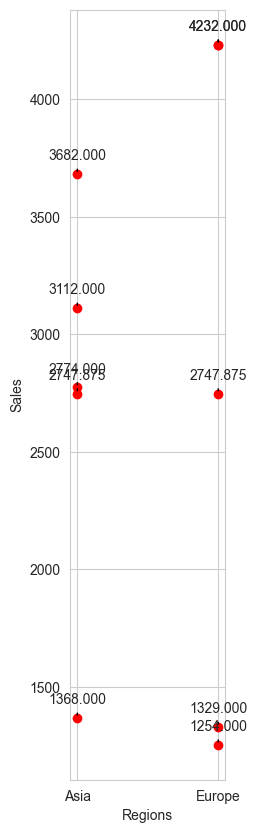

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(2,10))
plt.ylabel("Sales")
plt.xlabel("Regions")
plt.scatter(df_world["Region"], df_world["Sales"], color="red")


# zip joins x and y coordinates in pairs
for x,y in zip(df_world["Region"], df_world["Sales"]):
    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="-", color='black'))


plt.show()                                               

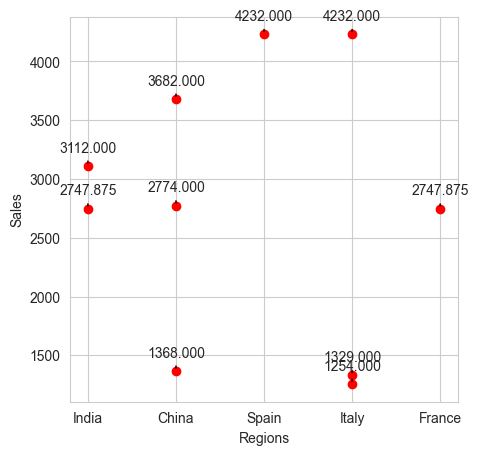

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
plt.ylabel("Sales")
plt.xlabel("Regions")
plt.scatter(df_world["Country"], df_world["Sales"], color="red")


# zip joins x and y coordinates in pairs
for x,y in zip(df_world["Country"], df_world["Sales"]):
    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="-", color='black'))


plt.show()                                               

### Pro and Cons

#### Pros:
    
1. Prevent data loss which results in deletion of rows and columns

2. Works well with a small dataset and easy to implement


#### Cons:
    
 1. Does not factor the covariance between features

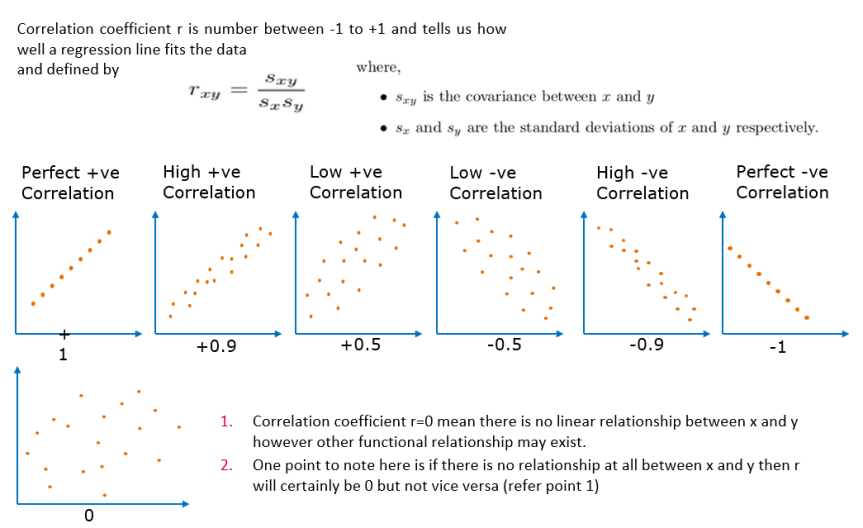

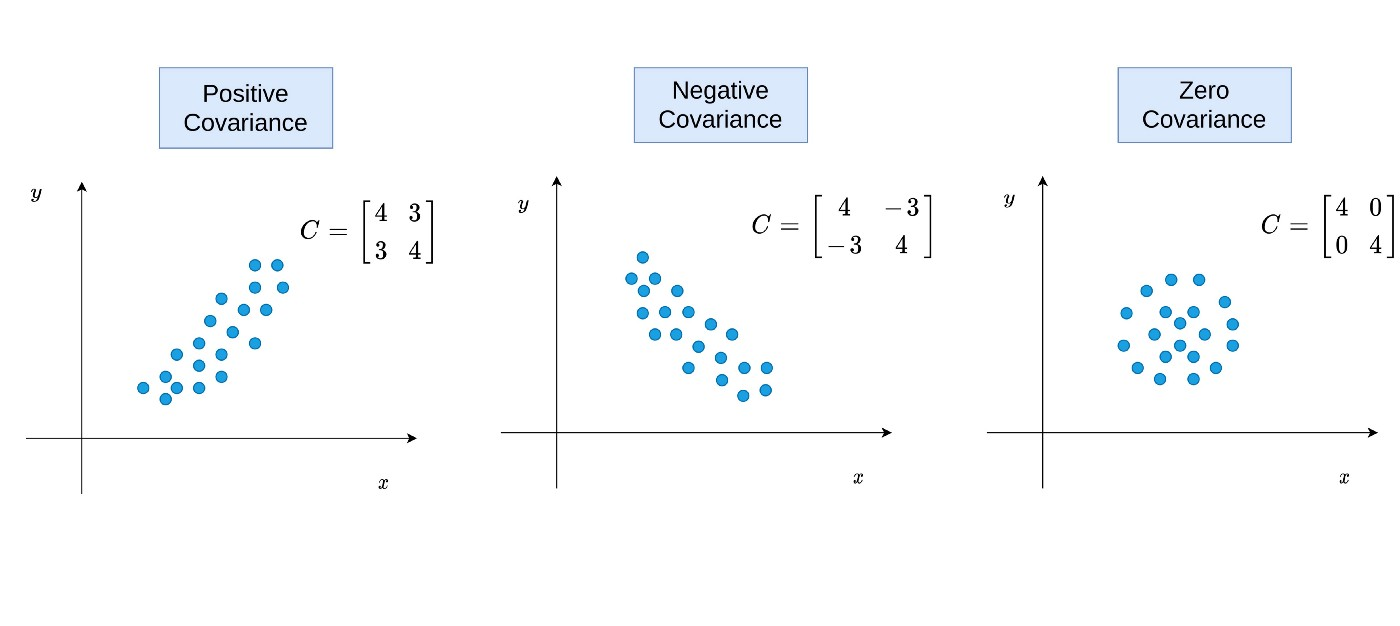

#### Conclusion 

Using the measures of central tendency involves substituting the missing values with the mean or median for numerical variables and the mode for categorical variables. This imputation technique works well with when the values are missing completely at random. One disadvantage is that mean imputation reduces variance in the dataset.

# 2. Imputation with Linear Regression

Predicting missing values of Data by Linear Regression Model

In [33]:
dataset = {"Experience":[2,3,4,5,9,8,7,1,5,3],
           "Salary":[20000,30000,50000,65000, 700000,69000,66000,18000,62000,32000],
           "Age":[27,24,25,np.NaN,25,None,45,None,20,28]
          }
df = pd.DataFrame(dataset)
df

,Experience,Salary,Age
0,2,20000,27.0
1,3,30000,24.0
2,4,50000,25.0
3,5,65000,NaN
4,9,700000,25.0
5,8,69000,NaN
6,7,66000,45.0
7,1,18000,NaN
8,5,62000,20.0
9,3,32000,28.0


In [34]:
df.shape

(10, 3)

In [35]:
df.columns = df.columns.str.lower()
df.columns

Index(['experience', 'salary', 'age'], dtype='object')

In [36]:
df

,experience,salary,age
0,2,20000,27.0
1,3,30000,24.0
2,4,50000,25.0
3,5,65000,NaN
4,9,700000,25.0
5,8,69000,NaN
6,7,66000,45.0
7,1,18000,NaN
8,5,62000,20.0
9,3,32000,28.0


In [37]:
df.isnull().sum()

experience    0
salary        0
age           3
dtype: int64

<AxesSubplot: >

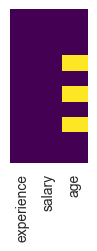

In [38]:
plt.figure(figsize=(1,2))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  

In [39]:
df.isnull().sum()

experience    0
salary        0
age           3
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   experience  10 non-null     int64  
 1   salary      10 non-null     int64  
 2   age         7 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 368.0 bytes


In [41]:
test_data = df[df["age"].isnull()]
test_data

,experience,salary,age
3,5,65000,NaN
5,8,69000,NaN
7,1,18000,NaN


In [42]:
#counting mussung value
missing_values_count = df.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

10.0

#### Creating x_train and y_train from DataFrame

In [43]:
df.dropna(inplace=True)
df

,experience,salary,age
0,2,20000,27.0
1,3,30000,24.0
2,4,50000,25.0
4,9,700000,25.0
6,7,66000,45.0
8,5,62000,20.0
9,3,32000,28.0


In [44]:
#y train means, "rows from the df["age"] with Non Null values.
y_train = df["age"]
y_train

0    27.0
1    24.0
2    25.0
4    25.0
6    45.0
8    20.0
9    28.0
Name: age, dtype: float64

In [45]:
y_train.shape

(7,)

In [46]:
#x_train means, "Dataset expected df["age"] features with Non Null Values
x_train = df.drop("age", axis=1)

In [47]:
x_train

,experience,salary
0,2,20000
1,3,30000
2,4,50000
4,9,700000
6,7,66000
8,5,62000
9,3,32000


In [48]:
x_train.shape

(7, 2)

#### Build the Model

In [49]:
# Create an instance of the LinearRegression class
model = LinearRegression()

# Call the fit() method on the instance, passing in the x_train and y_train data
model.fit(x_train, y_train)

LinearRegression()

In [50]:
#creating the x test from the test_data
x_test = test_data.drop("age", axis=1)
x_test

,experience,salary
3,5,65000
5,8,69000
7,1,18000


In [51]:
x_test.shape

(3, 2)

In [52]:
#Aplying the trained model on x test
y_prediction = model.predict(x_test)
y_prediction

array([31.00014542, 41.28795529, 18.60795708])

In [53]:
y_prediction.shape

(3,)

In [54]:
test_data.loc[test_data.age.isnull(), "age"] = y_prediction

In [55]:
test_data

,experience,salary,age
3,5,65000,31.000145
5,8,69000,41.287955
7,1,18000,18.607957


In [56]:
df

,experience,salary,age
0,2,20000,27.0
1,3,30000,24.0
2,4,50000,25.0
4,9,700000,25.0
6,7,66000,45.0
8,5,62000,20.0
9,3,32000,28.0


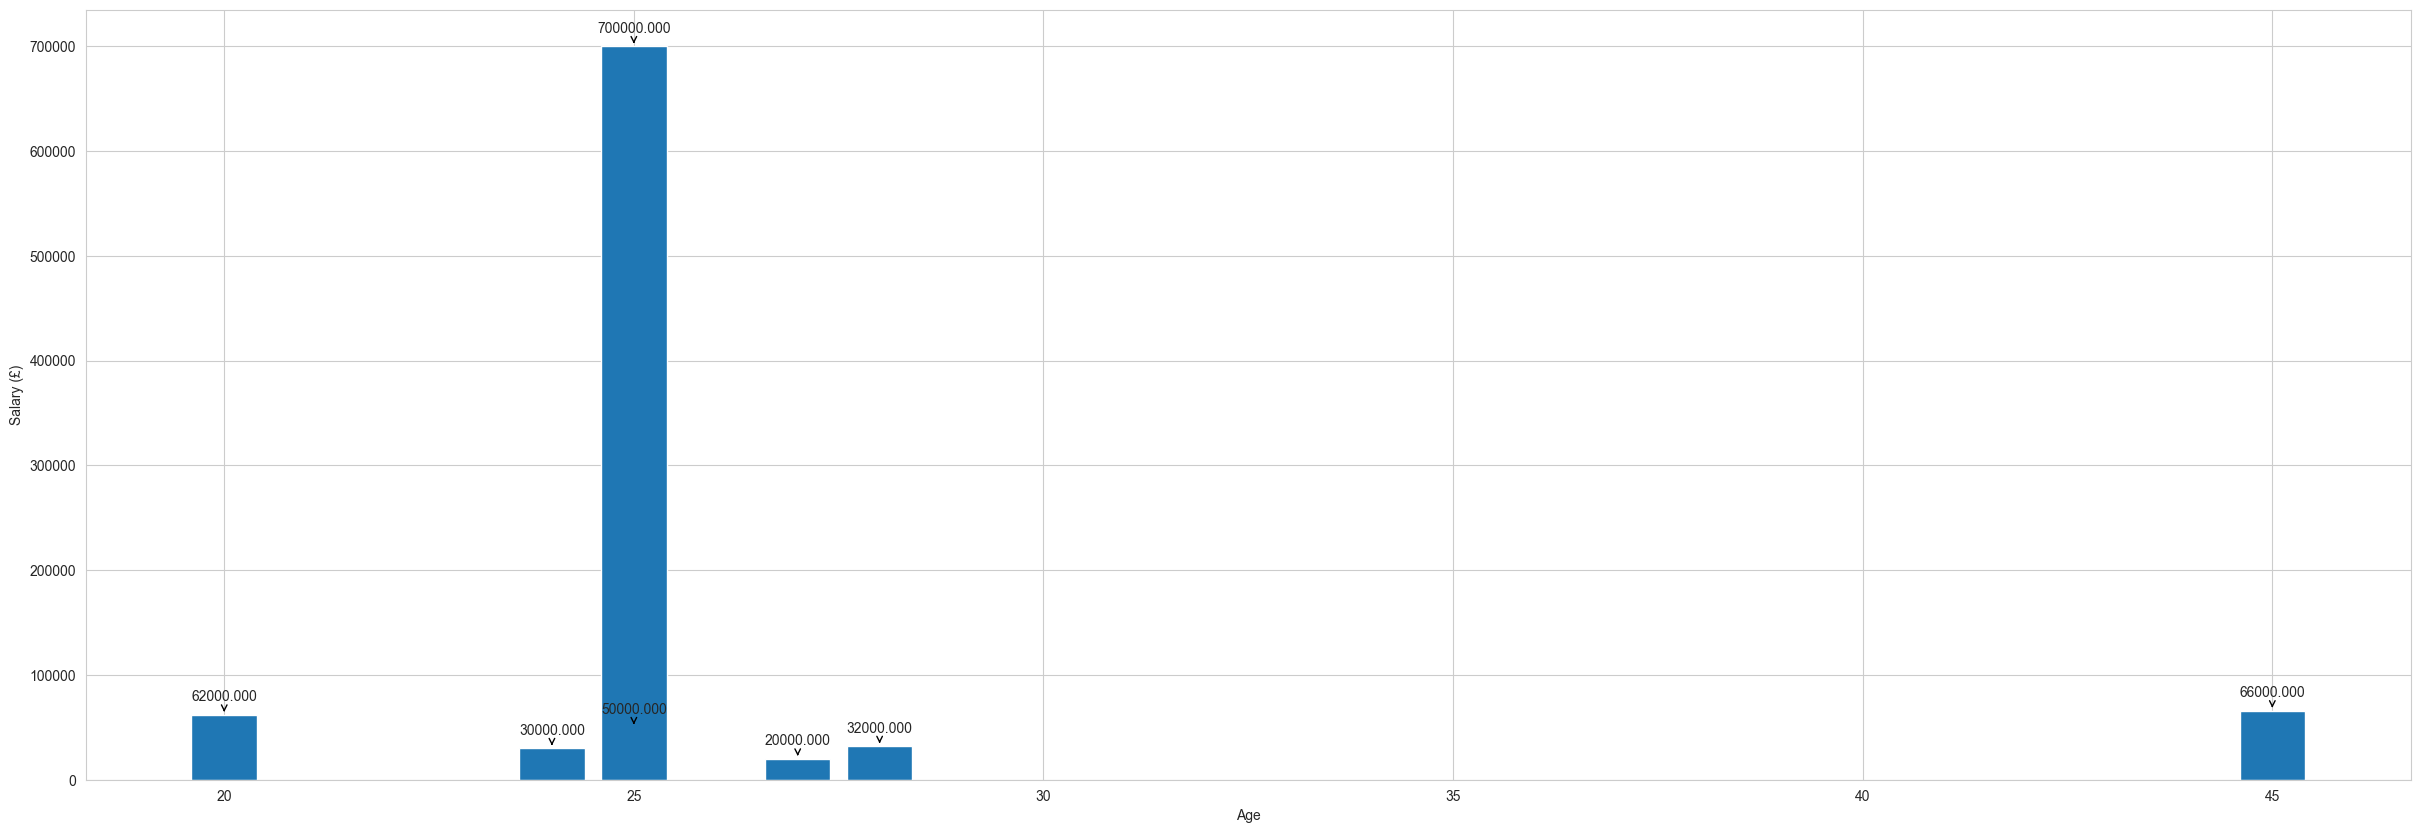

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,10))
plt.bar(df.age, df.salary)
plt.ylabel("Salary (£)")
plt.xlabel("Age")

# zip joins x and y coordinates in pairs
for x,y in zip(df.age,df.salary):
    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='black'))

plt.show()

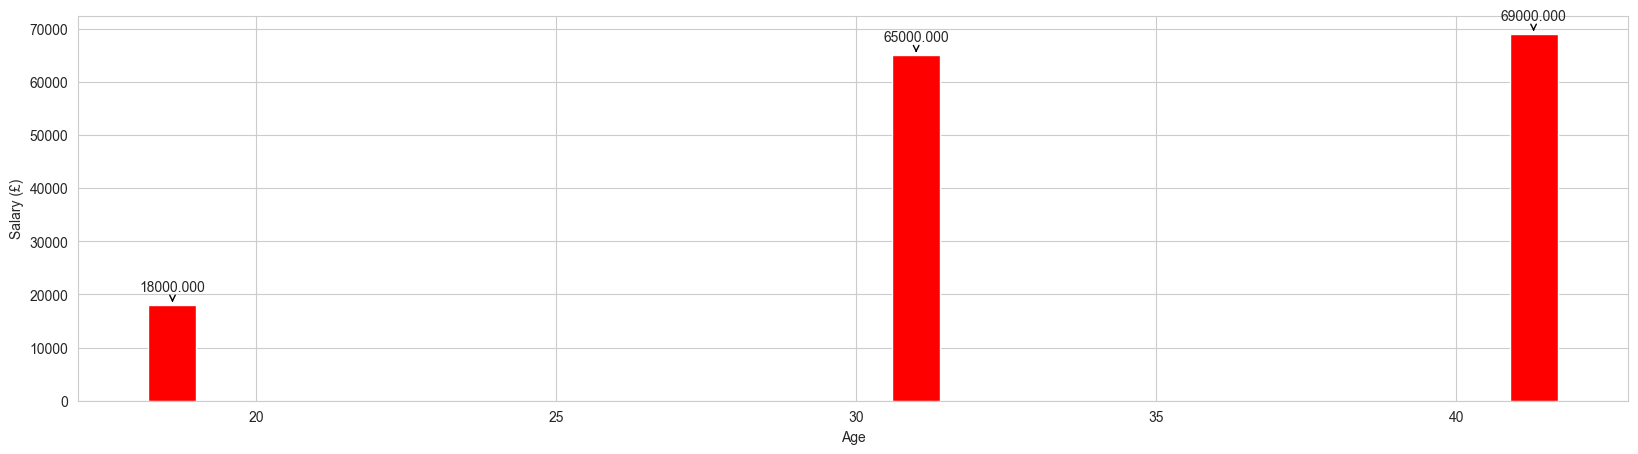

In [58]:
#prediction
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
plt.bar(test_data.age, test_data.salary, color="red")
plt.ylabel("Salary (£)")
plt.xlabel("Age")

# zip joins x and y coordinates in pairs
for x,y in zip(test_data.age,test_data.salary):
    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='black'))


plt.show()

#### Conclusion 

This is an imputation technique that utilises variables from the observed data to replace the missing values with predicted values from a regression model. Complete observations are used to generate the regression equation; the equation is then used to predict missing values for incomplete observations. In an iterative process, values for the missing variable are inserted and then all cases are used to predict the dependent variable. These steps are repeated until there is little difference between the predicted values from one step to the next, that is they converge. The major drawback of using this method is that it reduces variability. Though we have not introduced regression yet, its important to keep this in mind.

## 3. k-Neareast Neighbor (kNN) Imputation

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

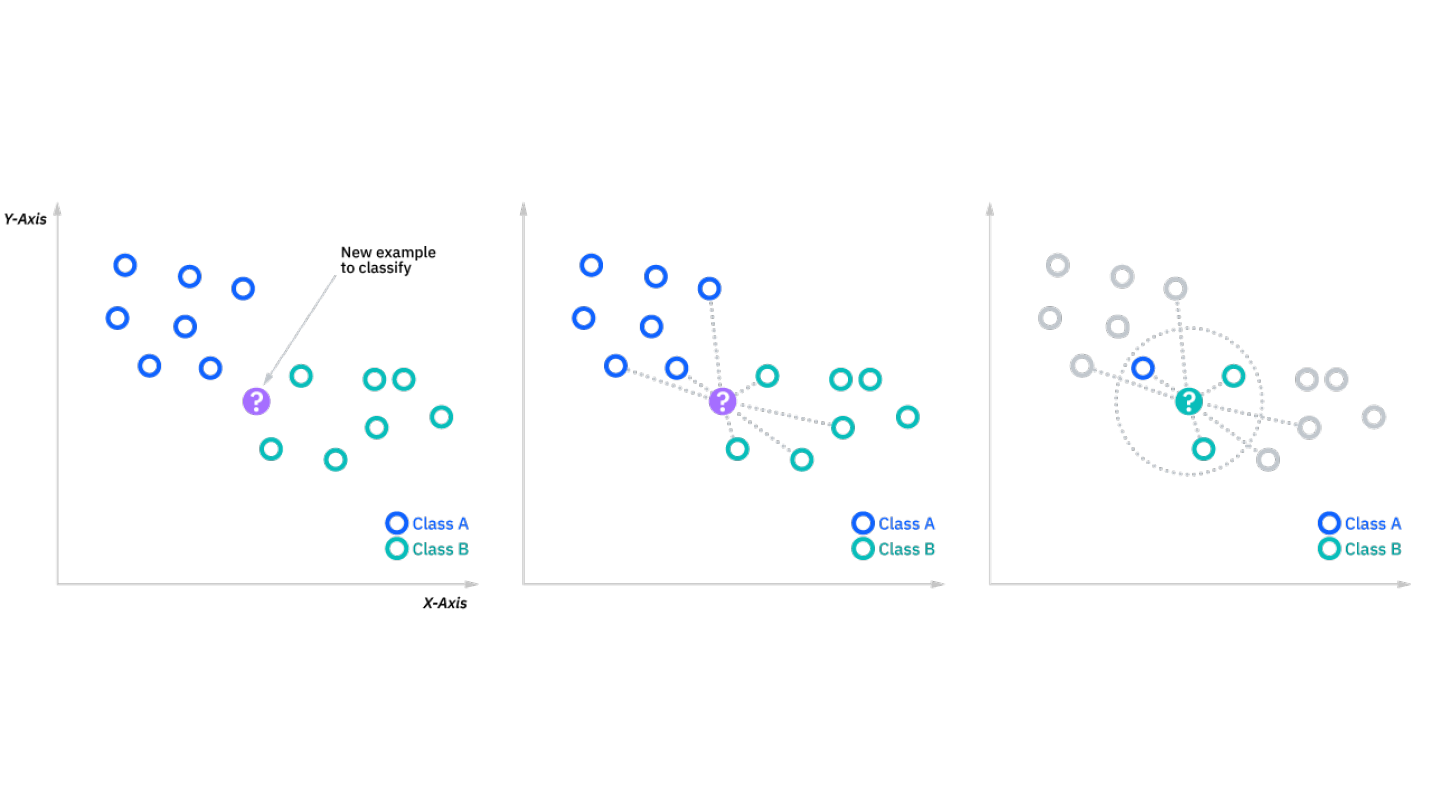

1. K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

2. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

3. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

4. K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

5. K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

6. KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

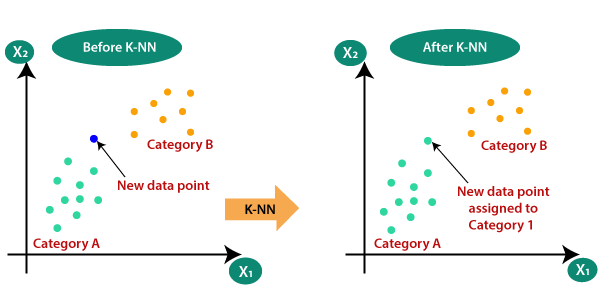

The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.

In [59]:
dataset_knn = {"Height":[167,182,176,173,172,174,169,173,170,170],
               "Weight":[51,62,69,64,65,56,58,57,55,57],
               "Class":["Underweight","Normal","Normal","Normal","Normal","Underweight", "Normal","Normal","Normal", "Unknown"],
                }
df_knn = pd.DataFrame(dataset_knn)
df_knn

,Height,Weight,Class
0,167,51,Underweight
1,182,62,Normal
2,176,69,Normal
3,173,64,Normal
4,172,65,Normal
5,174,56,Underweight
6,169,58,Normal
7,173,57,Normal
8,170,55,Normal
9,170,57,Unknown


In [60]:
dataset_knn = {"Height":[167,182,176,173,172,174,169,173,170,170],
               "Weight":[51,62,69,64,65,56,58,57,55,57],
               "Class":["Underweight","Normal","Normal","Normal","Normal","Underweight", "Normal","Normal","Normal", "Unknown"],
                }
#Height and weight of unkown data
x2 = 170
y2 = 57
distances = []
for i in range(len(dataset_knn["Height"])):
    x1 = dataset_knn["Height"][i]
    y1 = dataset_knn["Weight"][i]
    d = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
    distances.append(d)
dataset_knn["Euclidean distance"] = distances
df = pd.DataFrame(dataset_knn)
df

,Height,Weight,Class,Euclidean distance
0,167,51,Underweight,6.708204
1,182,62,Normal,13.000000
2,176,69,Normal,13.416408
3,173,64,Normal,7.615773
4,172,65,Normal,8.246211
5,174,56,Underweight,4.123106
6,169,58,Normal,1.414214
7,173,57,Normal,3.000000
8,170,55,Normal,2.000000
9,170,57,Unknown,0.000000


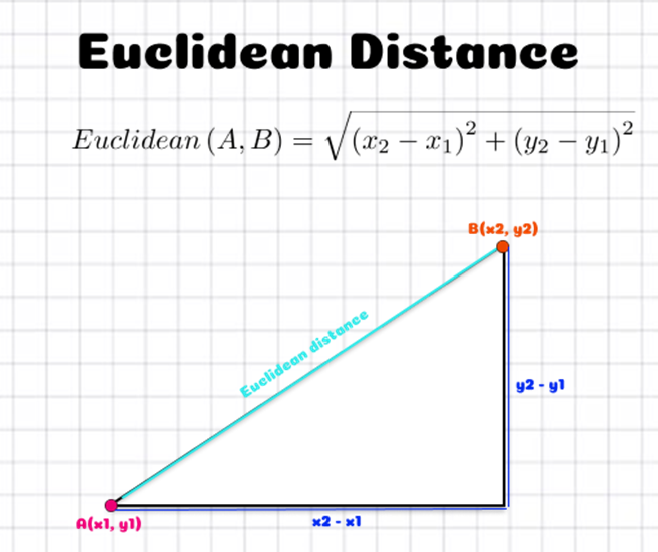 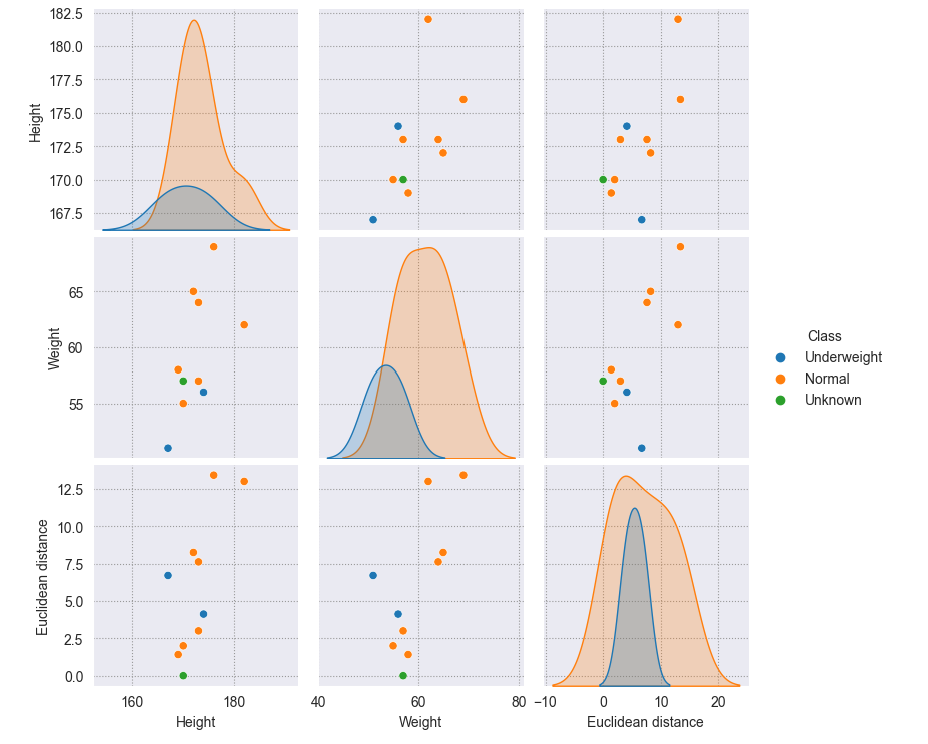

In [61]:
df_knn

,Height,Weight,Class
0,167,51,Underweight
1,182,62,Normal
2,176,69,Normal
3,173,64,Normal
4,172,65,Normal
5,174,56,Underweight
6,169,58,Normal
7,173,57,Normal
8,170,55,Normal
9,170,57,Unknown


In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
scaler.fit(df_knn.drop("Class", axis=1))

StandardScaler()

In [65]:
scaled_features = scaler.transform(df_knn.drop("Class", axis=1))

In [66]:
df_feature = pd.DataFrame(scaled_features, columns=df_knn.columns[:-1])
df_feature

,Height,Weight
0,-1.398253,-1.627467
1,2.347068,0.503740
2,0.848939,1.859962
3,0.099875,0.891232
4,-0.149813,1.084978
5,0.349563,-0.658737
6,-0.898877,-0.271244
7,0.099875,-0.464991
8,-0.649189,-0.852483
9,-0.649189,-0.464991


##### Pair Plot

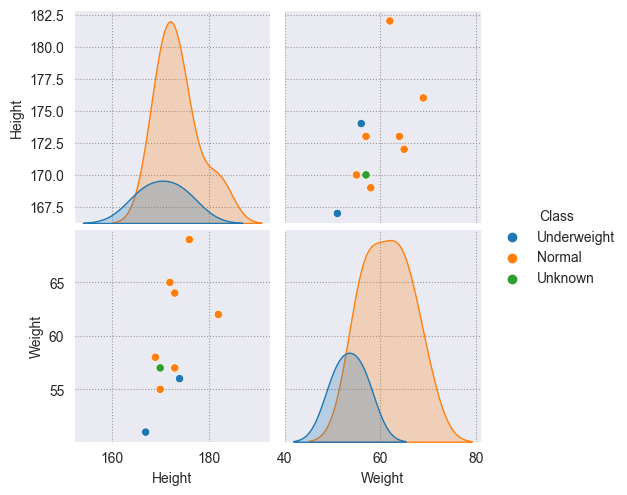

In [67]:
sns.set_style("darkgrid",{"grid.color":".6","grid.linestyle":":"})
sns.pairplot(df_knn, hue="Class")

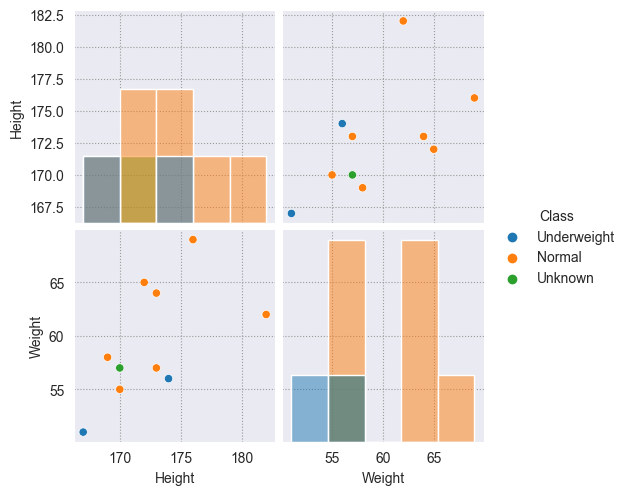

In [68]:
sns.pairplot(df_knn, hue = "Class", diag_kind = 'hist')

#### Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df_knn["Class"], test_size=0.30)

#### Using KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)

In [73]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
predict = knn.predict(x_test)

### Predictions and Evaluations

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [76]:
print(confusion_matrix(y_test, predict))

[[1 1 0]
 [0 0 0]
 [1 0 0]]


In [77]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

      Normal       0.50      0.50      0.50         2
 Underweight       0.00      0.00      0.00         0
     Unknown       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.17      0.17      0.17         3
weighted avg       0.33      0.33      0.33         3



#### Choosing K value

In [78]:
df_knn

,Height,Weight,Class
0,167,51,Underweight
1,182,62,Normal
2,176,69,Normal
3,173,64,Normal
4,172,65,Normal
5,174,56,Underweight
6,169,58,Normal
7,173,57,Normal
8,170,55,Normal
9,170,57,Unknown


In [79]:
df_feature

,Height,Weight
0,-1.398253,-1.627467
1,2.347068,0.503740
2,0.848939,1.859962
3,0.099875,0.891232
4,-0.149813,1.084978
5,0.349563,-0.658737
6,-0.898877,-0.271244
7,0.099875,-0.464991
8,-0.649189,-0.852483
9,-0.649189,-0.464991


In [80]:
accuracy_rate = []

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feature, df_knn["Class"], cv=7)
    accuracy_rate.append(score.mean())

accuracy_rate

[0.35714285714285715,
 0.6428571428571429,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857]

In [81]:
error_rate = []

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feature, df_knn["Class"], cv=7)
    error_rate.append(1-score.mean())
error_rate

[0.6428571428571428,
 0.3571428571428571,
 0.2142857142857143,
 0.2142857142857143,
 0.2142857142857143,
 0.2142857142857143,
 0.2142857142857143,
 0.2142857142857143]

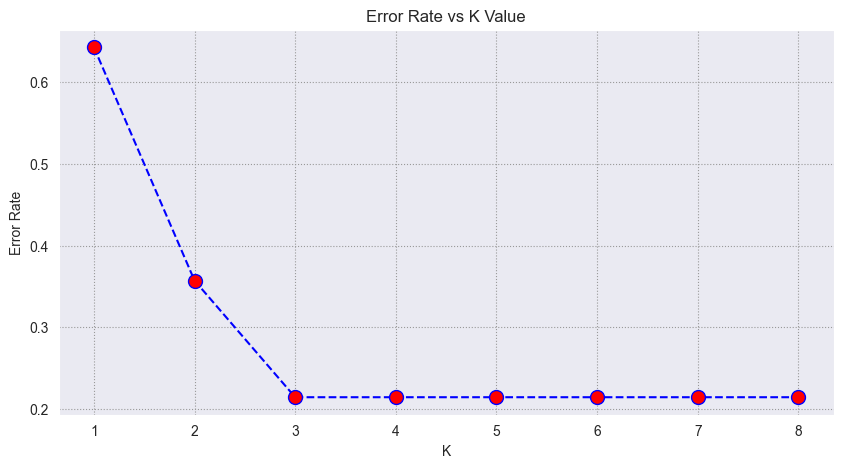

In [82]:
plt.figure(figsize=(10,5))
plt.plot(range(1,9), error_rate, color="blue", linestyle="dashed", marker="o",
         markerfacecolor="red", markersize=10)


plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

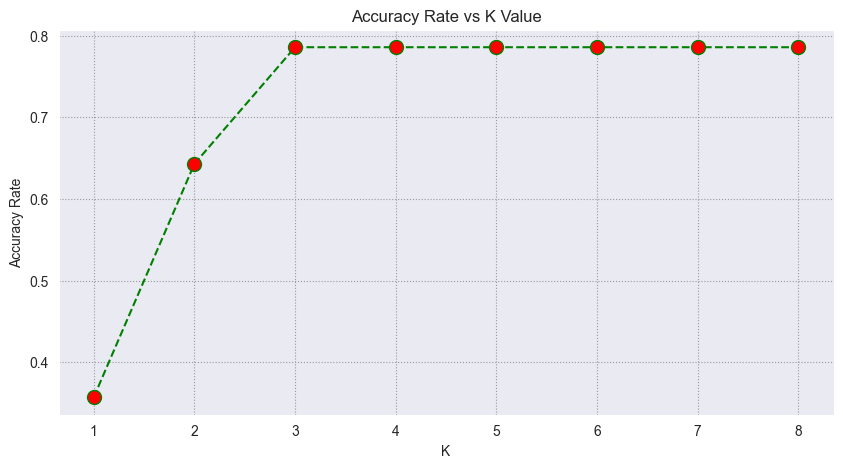

In [83]:
plt.figure(figsize=(10,5))
plt.plot(range(1,9), accuracy_rate, color="green", linestyle="dashed", marker="o",
         markerfacecolor="red", markersize=10)

plt.title("Accuracy Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy Rate")
plt.show()

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)
print("With K=3")
print("\n")
print(confusion_matrix(y_test, predict))
print("\n")
print(classification_report(y_test,predict))

With K=3


[[2 0]
 [1 0]]


              precision    recall  f1-score   support

      Normal       0.67      1.00      0.80         2
     Unknown       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



In [85]:
from sklearn.metrics.pairwise import euclidean_distances

point1 = [df_knn["Height"]]
point2 = [df_knn["Weight"]]

distance = euclidean_distances(point1, point2)
print(distance[0][0])

358.23176855214837


#### Example Distance formula for multiple data structures

Example 1

In [86]:
dataset = [[167, 51, 'Underweight'],
           [182, 62, 'Normal'],
           [176, 69, 'Normal'],
           [173, 64, 'Normal'],
           [172, 65, 'Normal'],
           [174, 56, 'Underweight'],
           [169, 58, 'Normal'],
           [173, 57, 'Normal'],
           [170, 55, 'Normal'],
           [170, 57, 'Unknown']]
x2 = 170
y2 = 57

distances = []
for i in dataset:
    x1 = i[0]
    y1 = i[1]
    d = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
    distances.append(d)

print(distances)

[6.708203932499369, 13.0, 13.416407864998739, 7.615773105863909, 8.246211251235321, 4.123105625617661, 1.4142135623730951, 3.0, 2.0, 0.0]


Example 2

In [87]:
dataset = [{'Height':167, 'Weight':51, 'Class':'Underweight'},
           {'Height':182, 'Weight':62, 'Class':'Normal'},
           {'Height':176, 'Weight':69, 'Class':'Normal'},
           {'Height':173, 'Weight':64, 'Class':'Normal'},
           {'Height':172, 'Weight':65, 'Class':'Normal'},
           {'Height':174, 'Weight':56, 'Class':'Underweight'},
           {'Height':169, 'Weight':58, 'Class':'Normal'},
           {'Height':173, 'Weight':57, 'Class':'Normal'},
           {'Height':170, 'Weight':55, 'Class':'Normal'},
           {'Height':170, 'Weight':57, 'Class':'Unknown'}]
x2 = 170
y2 = 57

distances = []
for data in dataset:
    x1 = data['Height']
    y1 = data['Weight']
    d = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
    distances.append(d)

print(distances)

[6.708203932499369, 13.0, 13.416407864998739, 7.615773105863909, 8.246211251235321, 4.123105625617661, 1.4142135623730951, 3.0, 2.0, 0.0]


Example 3

In [88]:
dataset_knn = {"Height":[167,182,176,173,172,174,169,173,170,170],
               "Weight":[51,62,69,64,65,56,58,57,55,57],
               "Class":["Underweight","Normal","Normal","Normal","Normal","Underweight", "Normal","Normal","Normal", "Unknown"],
                }

x2 = 170
y2 = 57

distances = []
for i in range(len(dataset_knn["Height"])):
    x1 = dataset_knn["Height"][i]
    y1 = dataset_knn["Weight"][i]
    d = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
    distances.append(d)

df_knn["Distance"] = distances
print(df_knn)

   Height  Weight        Class   Distance
0     167      51  Underweight   6.708204
1     182      62       Normal  13.000000
2     176      69       Normal  13.416408
3     173      64       Normal   7.615773
4     172      65       Normal   8.246211
5     174      56  Underweight   4.123106
6     169      58       Normal   1.414214
7     173      57       Normal   3.000000
8     170      55       Normal   2.000000
9     170      57      Unknown   0.000000


## 4.  Polynomial Regression Model

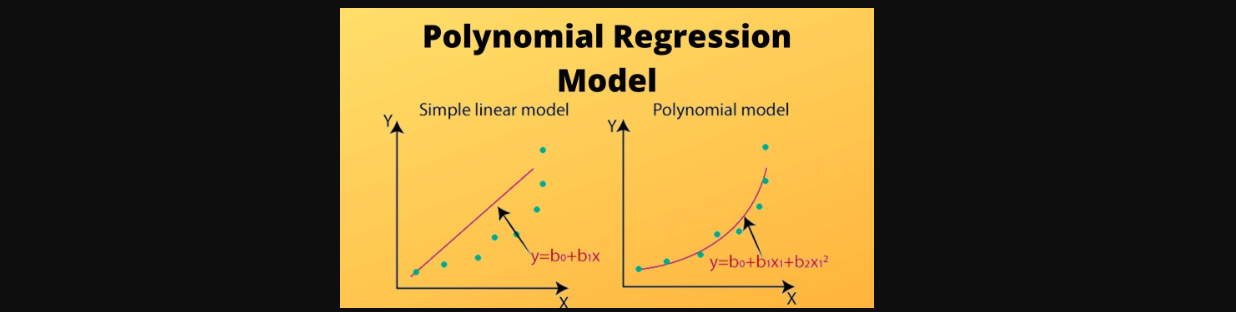

1. Polynomial Regression is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial.

2. Polynomial Regression models are usually fit with the method of least squares.The least square method minimizes the variance of the coefficients,under the Gauss Markov Theorem.

3. Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables.

#### 3. Types of Polynomial Regression
A quadratic equation is a general term for a second-degree polynomial equation. This degree, on the other hand, can go up to nth values. Polynomial regression can so be categorized as follows:

1. Linear – if degree as 1

2. Quadratic – if degree as 2

3. Cubic – if degree as 3 and goes on, on the basis of degree

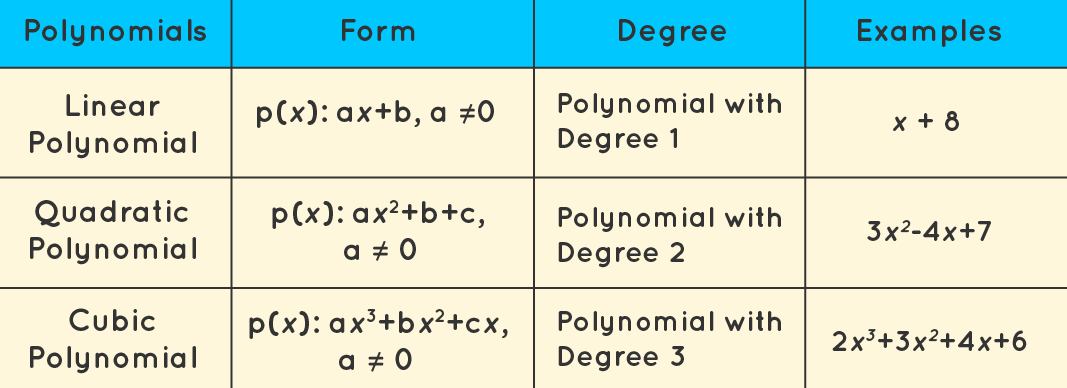

#### 3. Assumption of Polynomial Regression
    

1. The behaviour of a dependent variable is explained by a linear, or curvilinear, additive relationship between the dependent variable and a set of k independent variables (xi, i=1 to k).
2. The relationship between the dependent variable and any independent variable is linear or curvilinear.
3. The independent variables do no depend on each other too.
4. The errors are independent, normally distributed with mean zero and a constant variance.

#### 4. Why do we need polynomial regression?

1. We make our model and find out that it performs very badly.

2. We observe between the actual value and the best fit line,which we predicted and it seems that the actual value has some kind of curve in the graph and our line is no where near to cutting the mean of the points.

3. This where polynomial Regression comes to the play, it predicts the best fit line that follows the pattern(curve) of the data.

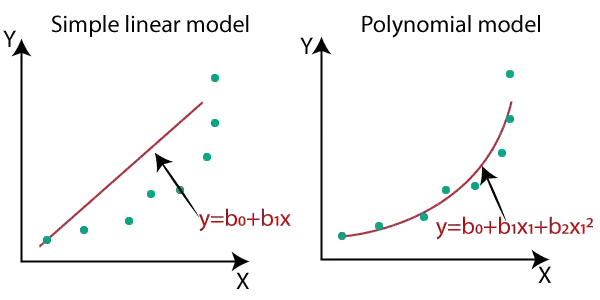

4. Polynomial Regression does not require the relationship between the independent and dependent variables to be linear in the data set,This is also one of the main difference between the Linear and Polynomial Regression.

5. Polynomial Regression is generally used when the points in the data are not captured by the Linear Regression Model and the Linear Regression fails in describing the best result clearly.

6. Increase the degree in the model,it tends to increase the performance of the model.However,increasing the degrees of the model also increases the risk of over-fitting and under-fitting the data.

#### 5. Mathetical Model of Polynomial Regression

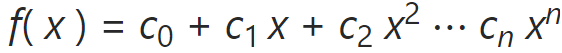

In [89]:
salary_data = {"Position":["Business Analyst", "Junior Consultant", "Senior Consultant", "Manager","Region Manager", "Country Manager", "Partner", "Senior Partner","C level", "CEO"],
               "Level":[1,2,3,4,5,6,7,8,9,10],
               "Salary":[45000,50000,60000,80000,110000,150000,200000,3000000,5000000,10000000]
              }

In [90]:
dataset = pd.DataFrame(salary_data)
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Region Manager,5,110000
5,Country Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,3000000
8,C level,9,5000000
9,CEO,10,10000000


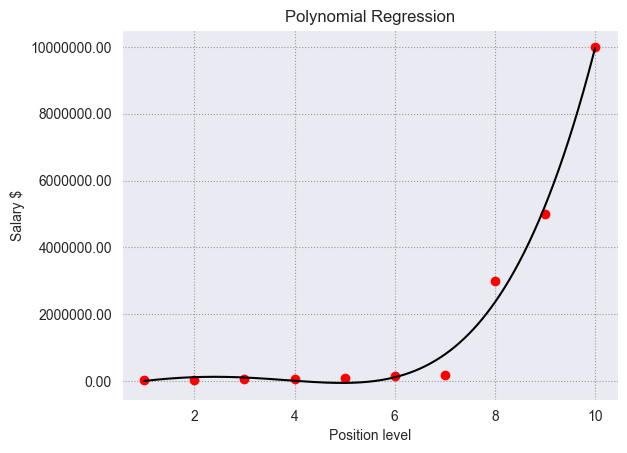

In [91]:
# Extract x and y values
x = dataset["Level"].values.reshape(-1,1)
y = dataset["Salary"].values.reshape(-1,1)
# Create polynomial features
poly_reg = PolynomialFeatures(degree = 4)
poly_features = poly_reg.fit_transform(x)
# Fit the polynomial regression model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(poly_features, y)
# Generate x_grid for plotting
x_grid = np.linspace(dataset["Level"].min(), dataset["Level"].max(), num=1000)
x_grid_poly = poly_reg.transform(x_grid.reshape(-1, 1))
# Visualizing the Polynomial Regression results 
plt.scatter(x, y, color = 'red') 
plt.plot(x_grid, lin_reg_2.predict(x_grid_poly), color = 'black')
# Set the y-axis tick label format to not use scientific notation
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xlabel('Position level') 
plt.ylabel('Salary $') 
plt.title('Polynomial Regression')
plt.show()

In [92]:
# Predict salary for position level 6.5
pred_6_5 = lin_reg_2.predict(poly_reg.transform(np.array([[6.5]])))
print(f"Predicted salary for position level 6.5: ${round(pred_6_5[0][0],2)}")

Predicted salary for position level 6.5: $373528.65


In [93]:
# Predict salary for position level 7.5
pred_7_5 = lin_reg_2.predict(poly_reg.transform(np.array([[7.5]])))
print(f"Predicted salary for position level 7.5: ${round(pred_7_5[0][0],2)}")

Predicted salary for position level 7.5: $1445146.51


In [94]:
pred_8_5 = lin_reg_2.predict(poly_reg.transform(np.array([[8.5]])))
print(f"Predicted salary for position level 8.5: ${round(pred_8_5[0][0],2)}")

Predicted salary for position level 8.5: $3606305.45


https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning